In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Number of points
n = 200
NPM = 10

In [3]:
# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

In [4]:
# Original function
y_true = 4 * np.sin(2*x + 0.2)

In [5]:
# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

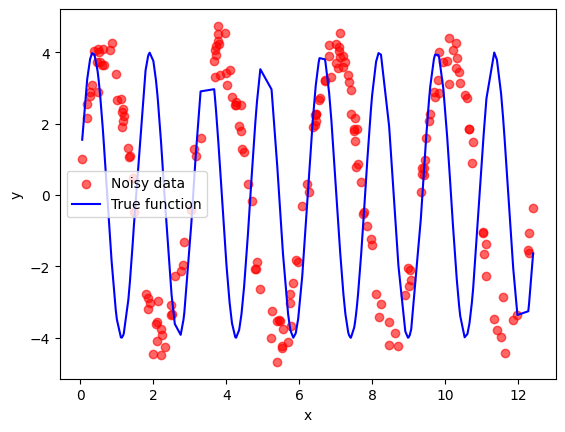

In [8]:
# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [7]:
# TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

In [12]:
# Grid untuk evaluasi
x_grid = np.linspace(0, 4*np.pi, 500)
y_true_grid = 4 * np.sin(2*x_grid + 0.2)

In [10]:
# Daftar orde yang mau diuji
orders = [1, 2, 3, 5, 9]

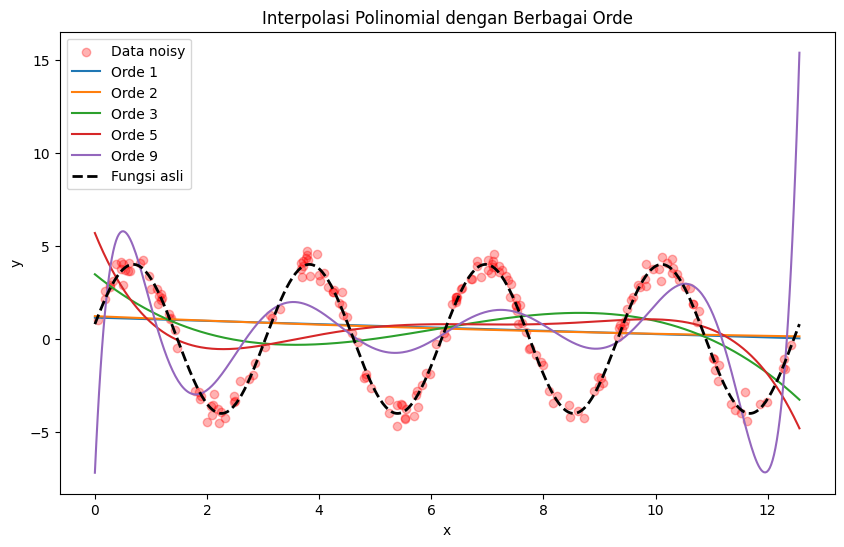

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color="red", alpha=0.3, label="Data noisy")

for deg in orders:
    coeffs = np.polyfit(x, y_noisy, deg)
    p = np.poly1d(coeffs)
    y_fit = p(x_grid)
    plt.plot(x_grid, y_fit, label=f"Orde {deg}")

plt.plot(x_grid, y_true_grid, "k--", linewidth=2, label="Fungsi asli")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolasi Polinomial dengan Berbagai Orde")
plt.legend()
plt.show()

**Interpretasi**

- Orde 1 (linear)

  Hanya berupa garis lurus.

  Tidak bisa menangkap pola sinus sama sekali.

  Error relatif sangat besar di mana tidak representatif untuk fungsi yang osilatif.

- Orde 2 (kuadratik)

  Bentuk parabola yang terlalu sederhana.

  Masih gagal menangkap osilasi fungsi sinus.

  Kurva hampir datar di mana hanya mengikuti tren rata-rata.

- Orde 3 (kubik)

  Sudah bisa sedikit melengkung, tetapi masih terlalu kaku.

  Hanya bisa meniru sebagian pola sinus, tidak cukup untuk seluruh interval.

- Orde 5

  Mulai terlihat mengikuti gelombang sinus.

  Pola naik-turun sudah muncul, meskipun belum sempurna.

  Cocok untuk mendekati data dalam kasus ini, kompromi antara kompleksitas dan akurasi.

- Orde 9

  Pola sinus mulai terlihat lebih mendetail, tetapi ada osilasi liar di ujung (edge effect).

  Fenomena ini disebut Runge’s phenomenon di mana polinomial derajat tinggi bisa “meledak” di batas domain.

  Bagian tengah relatif bagus, tetapi ujung-ujung sangat tidak stabil.

**Kesimpulan**

  Interpolasi orde rendah (1–3) terlalu sederhana dan tidak bisa menangkap osilasi sinus.

  Orde menengah (5) memberi hasil cukup baik, mendekati fungsi asli meskipun masih ada deviasi karena noise.

  Orde tinggi (9) bisa mendekati pola sinus di tengah domain, tetapi justru berbahaya di ujung karena osilasi berlebih.

  Hal ini menunjukkan trade-off: semakin tinggi orde polinomial, semakin sensitif terhadap noise dan ujung interval.